#Data analysis using Python on Google Colab


# Overview
1. Read from a csv file
2. Review data
3. Summary statistics and distributions
4. Drop outliers
5. Compare groups
6. Cross tabs and correlations
7. Regression




# Read data

In [ ]:
#We use pandas package to read the csv file into a dataframe structure
#and perform data analysis
# A dataframe is structure to store spreadsheet like data.  It has rows, columns,
# row index, column names.  There are functions to access specific row by the
# number or index
# You can filter rows by using filter conditions.
# To filter columns, you can specify a list column names
import pandas as pd
path = '/content/drive/MyDrive/Classroom/Summer 2025 CIS 645 21/'
cereals = pd.read_csv(path+'Cereal Data.csv')
cereals # see top 10 and bottom 10 rows of data
# Like a spreasheet, a dataframe structure has column headers and rows of data
# A dataframe also has an index to uniquely identify each row

,name,mfr_name,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,3,60,25,1.0,0.75
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,2,25,25,1.0,1.00
74,Wheat_Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,1,115,25,1.0,0.67
75,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,1,110,25,1.0,1.00


# Review data

In [ ]:
cereals.shape

(77, 15)

In [ ]:
print(cereals.dtypes)


name         object
mfr_name     object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
shelf         int64
potass        int64
vitamins      int64
weight      float64
cups        float64
dtype: object


In [ ]:
#see first 30 rows
cereals[0:30]


,name,mfr_name,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.00,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.00,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.00,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.00,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.00,0.75
5,Apple_Cinnamon_Cheerios,General Mills,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
6,Apple_Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14,2,30,25,1.00,1.00
7,Basic_4,General Mills,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
8,Bran_Chex,Ralston Purina,C,90,2,1,200,4.0,15.0,6,1,125,25,1.00,0.67
9,Bran_Flakes,Post,C,90,3,0,210,5.0,13.0,5,3,190,25,1.00,0.67


In [ ]:
 #see selected columns and rows #40 onwards
cereals[['name', 'mfr_name', 'carbo', 'sugars']][40:]

,name,mfr_name,carbo,sugars
40,Kix,General Mills,21.0,3
41,Life,Quaker Oats,12.0,6
42,Lucky_Charms,General Mills,12.0,12
43,Maypo,American Home Food Products,16.0,3
44,"Muesli_Raisins,_Dates,_&_Almonds",Ralston Purina,16.0,11
45,"Muesli_Raisins,_Peaches,_&_Pecans",Ralston Purina,16.0,11
46,Mueslix_Crispy_Blend,Kelloggs,17.0,13
47,Multi-Grain_Cheerios,General Mills,15.0,6
48,Nut&Honey_Crunch,Kelloggs,15.0,9
49,Nutri-Grain_Almond-Raisin,Kelloggs,21.0,7


In [ ]:
#to get to know the data types
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr_name  77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  potass    77 non-null     int64  
 12  vitamins  77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
dtypes: float64(4), int64(8), object(3)
memory usage: 9.2+ KB


In [ ]:
# to see the number of rows and columns
cereals.shape

(77, 15)

In [ ]:
#to see the column names
cereals.columns

Index(['name', 'mfr_name', 'type', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight',
       'cups'],
      dtype='object')

In [ ]:
#setting the index for the dataframe.  Make sure the column values are unique
cereals = cereals.set_index('name')

In [ ]:
#to see what column is the index for the dataframe
cereals.index

Index(['100%_Bran', '100%_Natural_Bran', 'All-Bran',
       'All-Bran_with_Extra_Fiber', 'Almond_Delight',
       'Apple_Cinnamon_Cheerios', 'Apple_Jacks', 'Basic_4', 'Bran_Chex',
       'Bran_Flakes', 'Cap'n'Crunch', 'Cheerios', 'Cinnamon_Toast_Crunch',
       'Clusters', 'Cocoa_Puffs', 'Corn_Chex', 'Corn_Flakes', 'Corn_Pops',
       'Count_Chocula', 'Cracklin'_Oat_Bran', 'Cream_of_Wheat_(Quick)',
       'Crispix', 'Crispy_Wheat_&_Raisins', 'Double_Chex', 'Froot_Loops',
       'Frosted_Flakes', 'Frosted_Mini-Wheats',
       'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Fruitful_Bran',
       'Fruity_Pebbles', 'Golden_Crisp', 'Golden_Grahams', 'Grape_Nuts_Flakes',
       'Grape-Nuts', 'Great_Grains_Pecan', 'Honey_Graham_Ohs',
       'Honey_Nut_Cheerios', 'Honey-comb', 'Just_Right_Crunchy__Nuggets',
       'Just_Right_Fruit_&_Nut', 'Kix', 'Life', 'Lucky_Charms', 'Maypo',
       'Muesli_Raisins,_Dates,_&_Almonds', 'Muesli_Raisins,_Peaches,_&_Pecans',
       'Mueslix_Crispy_Blend', 'Multi-Gr

In [ ]:
# to find a specific row by its index
cereals.loc['100%_Natural_Bran']  # use the .loc function to see the column values of a specific row

,100%_Natural_Bran
mfr_name,Quaker Oats
type,C
calories,120
protein,3
fat,5
sodium,15
fiber,2.0
carbo,8.0
sugars,8
shelf,3


In [ ]:
# Filtering the data using a set of OR operations

cereals[(cereals['carbo']==-1) |
        (cereals['potass']==-1) |
        (cereals['sugars']==-1) |
        (cereals['weight']==-1)|
        (cereals['cups']==-1)]


,mfr_name,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups
name,,,,,,,,,,,,,,
100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.00,-1.00
Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.00,0.75
Cream_of_Wheat_(Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,2,-1,0,1.00,1.00
Just_Right_Crunchy__Nuggets,Kelloggs,C,110,2,1,170,1.0,17.0,6,3,60,100,1.00,-1.00
Maypo,American Home Food Products,H,100,4,1,0,0.0,16.0,3,2,95,25,1.00,-1.00
"Muesli_Raisins,_Dates,_&_Almonds",Ralston Purina,C,150,4,3,95,3.0,16.0,11,3,170,25,-1.00,-1.00
"Muesli_Raisins,_Peaches,_&_Pecans",Ralston Purina,C,150,4,3,150,3.0,16.0,11,3,170,25,-1.00,-1.00
Nutri-grain_Wheat,Kelloggs,C,90,3,0,170,3.0,18.0,2,3,90,25,1.00,-1.00
Puffed_Wheat,Quaker Oats,C,50,2,0,0,1.0,10.0,0,3,50,0,0.50,-1.00


In [ ]:
#replace the -1 carbo value with the average of carbo
cereals_new = cereals.copy()
mean_carbo = cereals[cereals['carbo']>-1]['carbo'].mean()
cereals_new.loc[cereals_new['carbo']==-1, 'carbo'] = mean_carbo

In [ ]:
#replace the -1 potass value with the average of potass
mean_potass = cereals[cereals['potass']>-1]['potass'].mean()
cereals_new.loc[cereals_new['potass']==-1, 'potass'] = mean_potass

<ipython-input-13-187bd65d01ff>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.66666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cereals_new.loc[cereals_new['potass']==-1, 'potass'] = mean_potass


In [ ]:
#replace the -1 sugars value with the average of sugars
mean_sugars = cereals[cereals['sugars']>-1]['sugars'].mean()
cereals_new.loc[cereals_new['sugars']==-1, 'sugars'] = mean_sugars


<ipython-input-14-a6f1273e30d6>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.026315789473684' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cereals_new.loc[cereals_new['sugars']==-1, 'sugars'] = mean_sugars


In [ ]:
#replace the -1 weight value with the average of weight
mean_weight = cereals[cereals['weight']>-1]['weight'].mean()
cereals_new.loc[cereals_new['weight']==-1, 'weight'] = mean_weight


In [ ]:
#replace the -1 cups value with the average of cups
mean_cups = cereals[cereals['cups']>-1]['cups'].mean()
cereals_new.loc[cereals_new['cups']==-1, 'cups'] = mean_cups


In [ ]:
cereals_new.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,2.207792,98.666667,28.246753,1.030400,0.797353
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,0.832524,69.478004,22.342523,0.150398,0.223298
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,1.000000,45.000000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,2.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,3.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,3.000000,330.000000,100.000000,1.500000,1.500000


# Summary statistics and distributions

In [ ]:
#to see summary statistics
cereals_summary = cereals_new.describe()
cereals_summary.round(2)


,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.80,7.03,2.21,98.67,28.25,1.03,0.80
std,19.48,1.09,1.01,83.83,2.38,3.88,4.35,0.83,69.48,22.34,0.15,0.22
min,50.00,1.00,0.00,0.00,0.00,5.00,0.00,1.00,15.00,0.00,0.50,0.25
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,1.00,45.00,25.00,1.00,0.67
50%,110.00,3.00,1.00,180.00,2.00,14.80,7.00,2.00,90.00,25.00,1.00,0.75
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,3.00,120.00,25.00,1.00,1.00
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,3.00,330.00,100.00,1.50,1.50


In [ ]:
#for object type data, compute frequency counts; Get to know how data is distributed
mfr_counts = cereals_new['mfr_name'].value_counts()
mfr_counts

,count
mfr_name,
Kelloggs,23
General Mills,22
Post,9
Quaker Oats,8
Ralston Purina,8
Nabisco,6
American Home Food Products,1


In [ ]:
#compute a statistic for a bunch of columns
cereals_new[['calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight',
       'cups']].skew()

,0
calories,-0.445407
protein,0.745830
fat,1.165989
sodium,-0.575711
fiber,2.431675
carbo,0.113435
sugars,0.044725
shelf,-0.410339
potass,1.418143
vitamins,2.463704


In [ ]:
#compute a statistic for a bunch of columns
cereals_new[['calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight',
       'cups']].kurt()

,0
calories,2.370146
protein,1.184656
fat,2.044655
sodium,-0.345243
fiber,8.647492
carbo,-0.301374
sugars,-1.127507
shelf,-1.439201
potass,2.093639
vitamins,6.257233


In [ ]:
# Find averages grouped by mfr_name
cereals_new.groupby(['mfr_name'])['carbo'].mean()

,carbo
mfr_name,
American Home Food Products,16.000000
General Mills,14.727273
Kelloggs,15.130435
Nabisco,16.000000
Post,13.222222
Quaker Oats,11.975329
Ralston Purina,17.625000


#Dropping outliers

<Axes: >

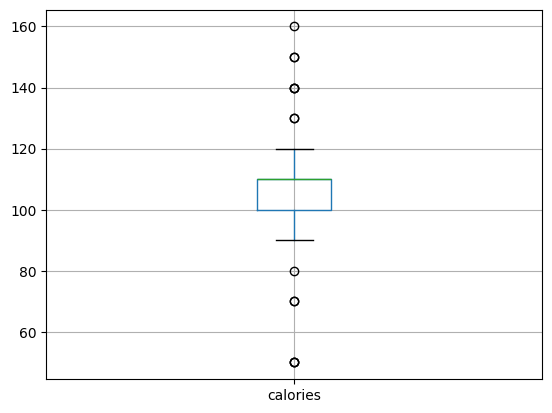

In [ ]:
#create boxplots of the numeric data to see if there are any outliers
cereals_new.boxplot(column=['calories'])

(63, 14)

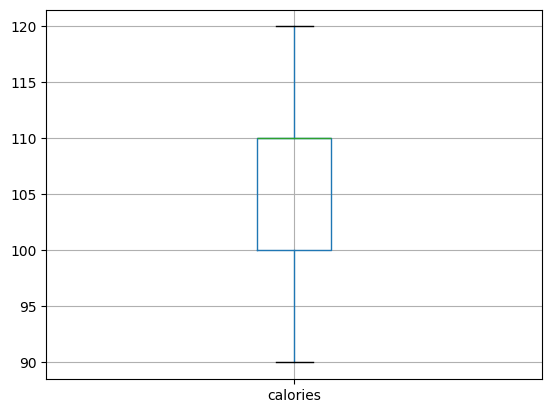

In [ ]:
# dropping outliers
summary_stats = cereals_new.describe()
IQR = summary_stats['calories']['75%'] - summary_stats['calories'] ['25%']
lower_limit = summary_stats['calories']['25%'] - 1.5*IQR
upper_limit = summary_stats['calories']['75%'] + 1.5*IQR
cereals_new = cereals_new[(cereals_new['calories']>lower_limit) & (cereals_new['calories']<upper_limit)]
cereals_new.boxplot(column=['calories'])
cereals_new.shape

In [ ]:
cereals_new.shape

(63, 14)

#Compare groups
Compare cereals grouped by manufacturer

<Axes: title={'center': 'carbo'}, ylabel='[mfr_name]'>

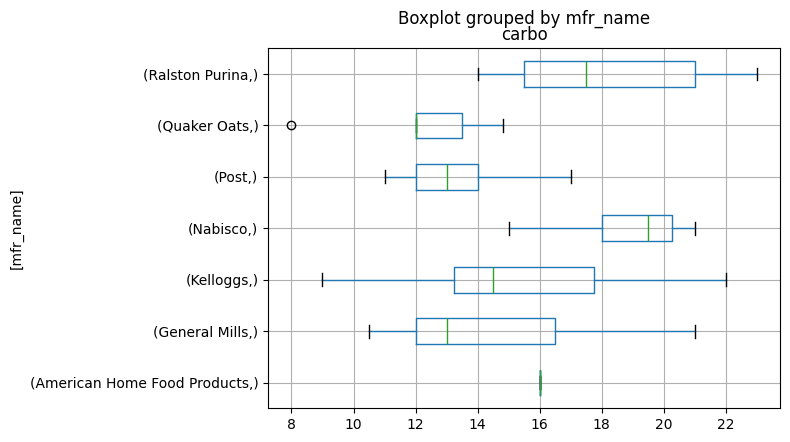

In [ ]:
import matplotlib as plt
cereals_new.boxplot(column=['carbo'], by=['mfr_name'],  vert=False)
#plt.xticks(rotation=25)
#plt.show()

<Axes: title={'center': 'calories'}, xlabel='[type]'>

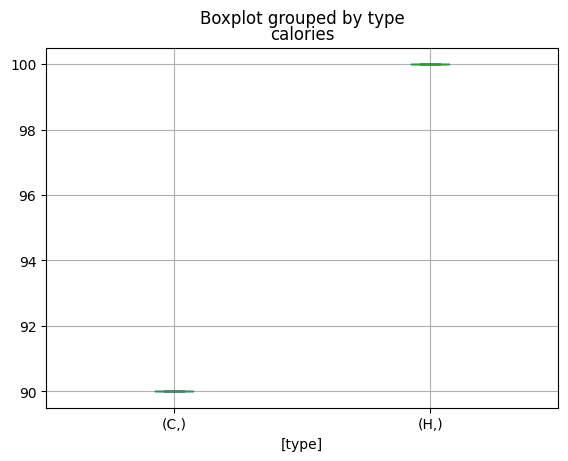

In [ ]:
cereals_new[cereals_new['mfr_name'] == 'Nabisco'].boxplot(column=['calories'], by=['type'])

#Scatterplots and historgrams

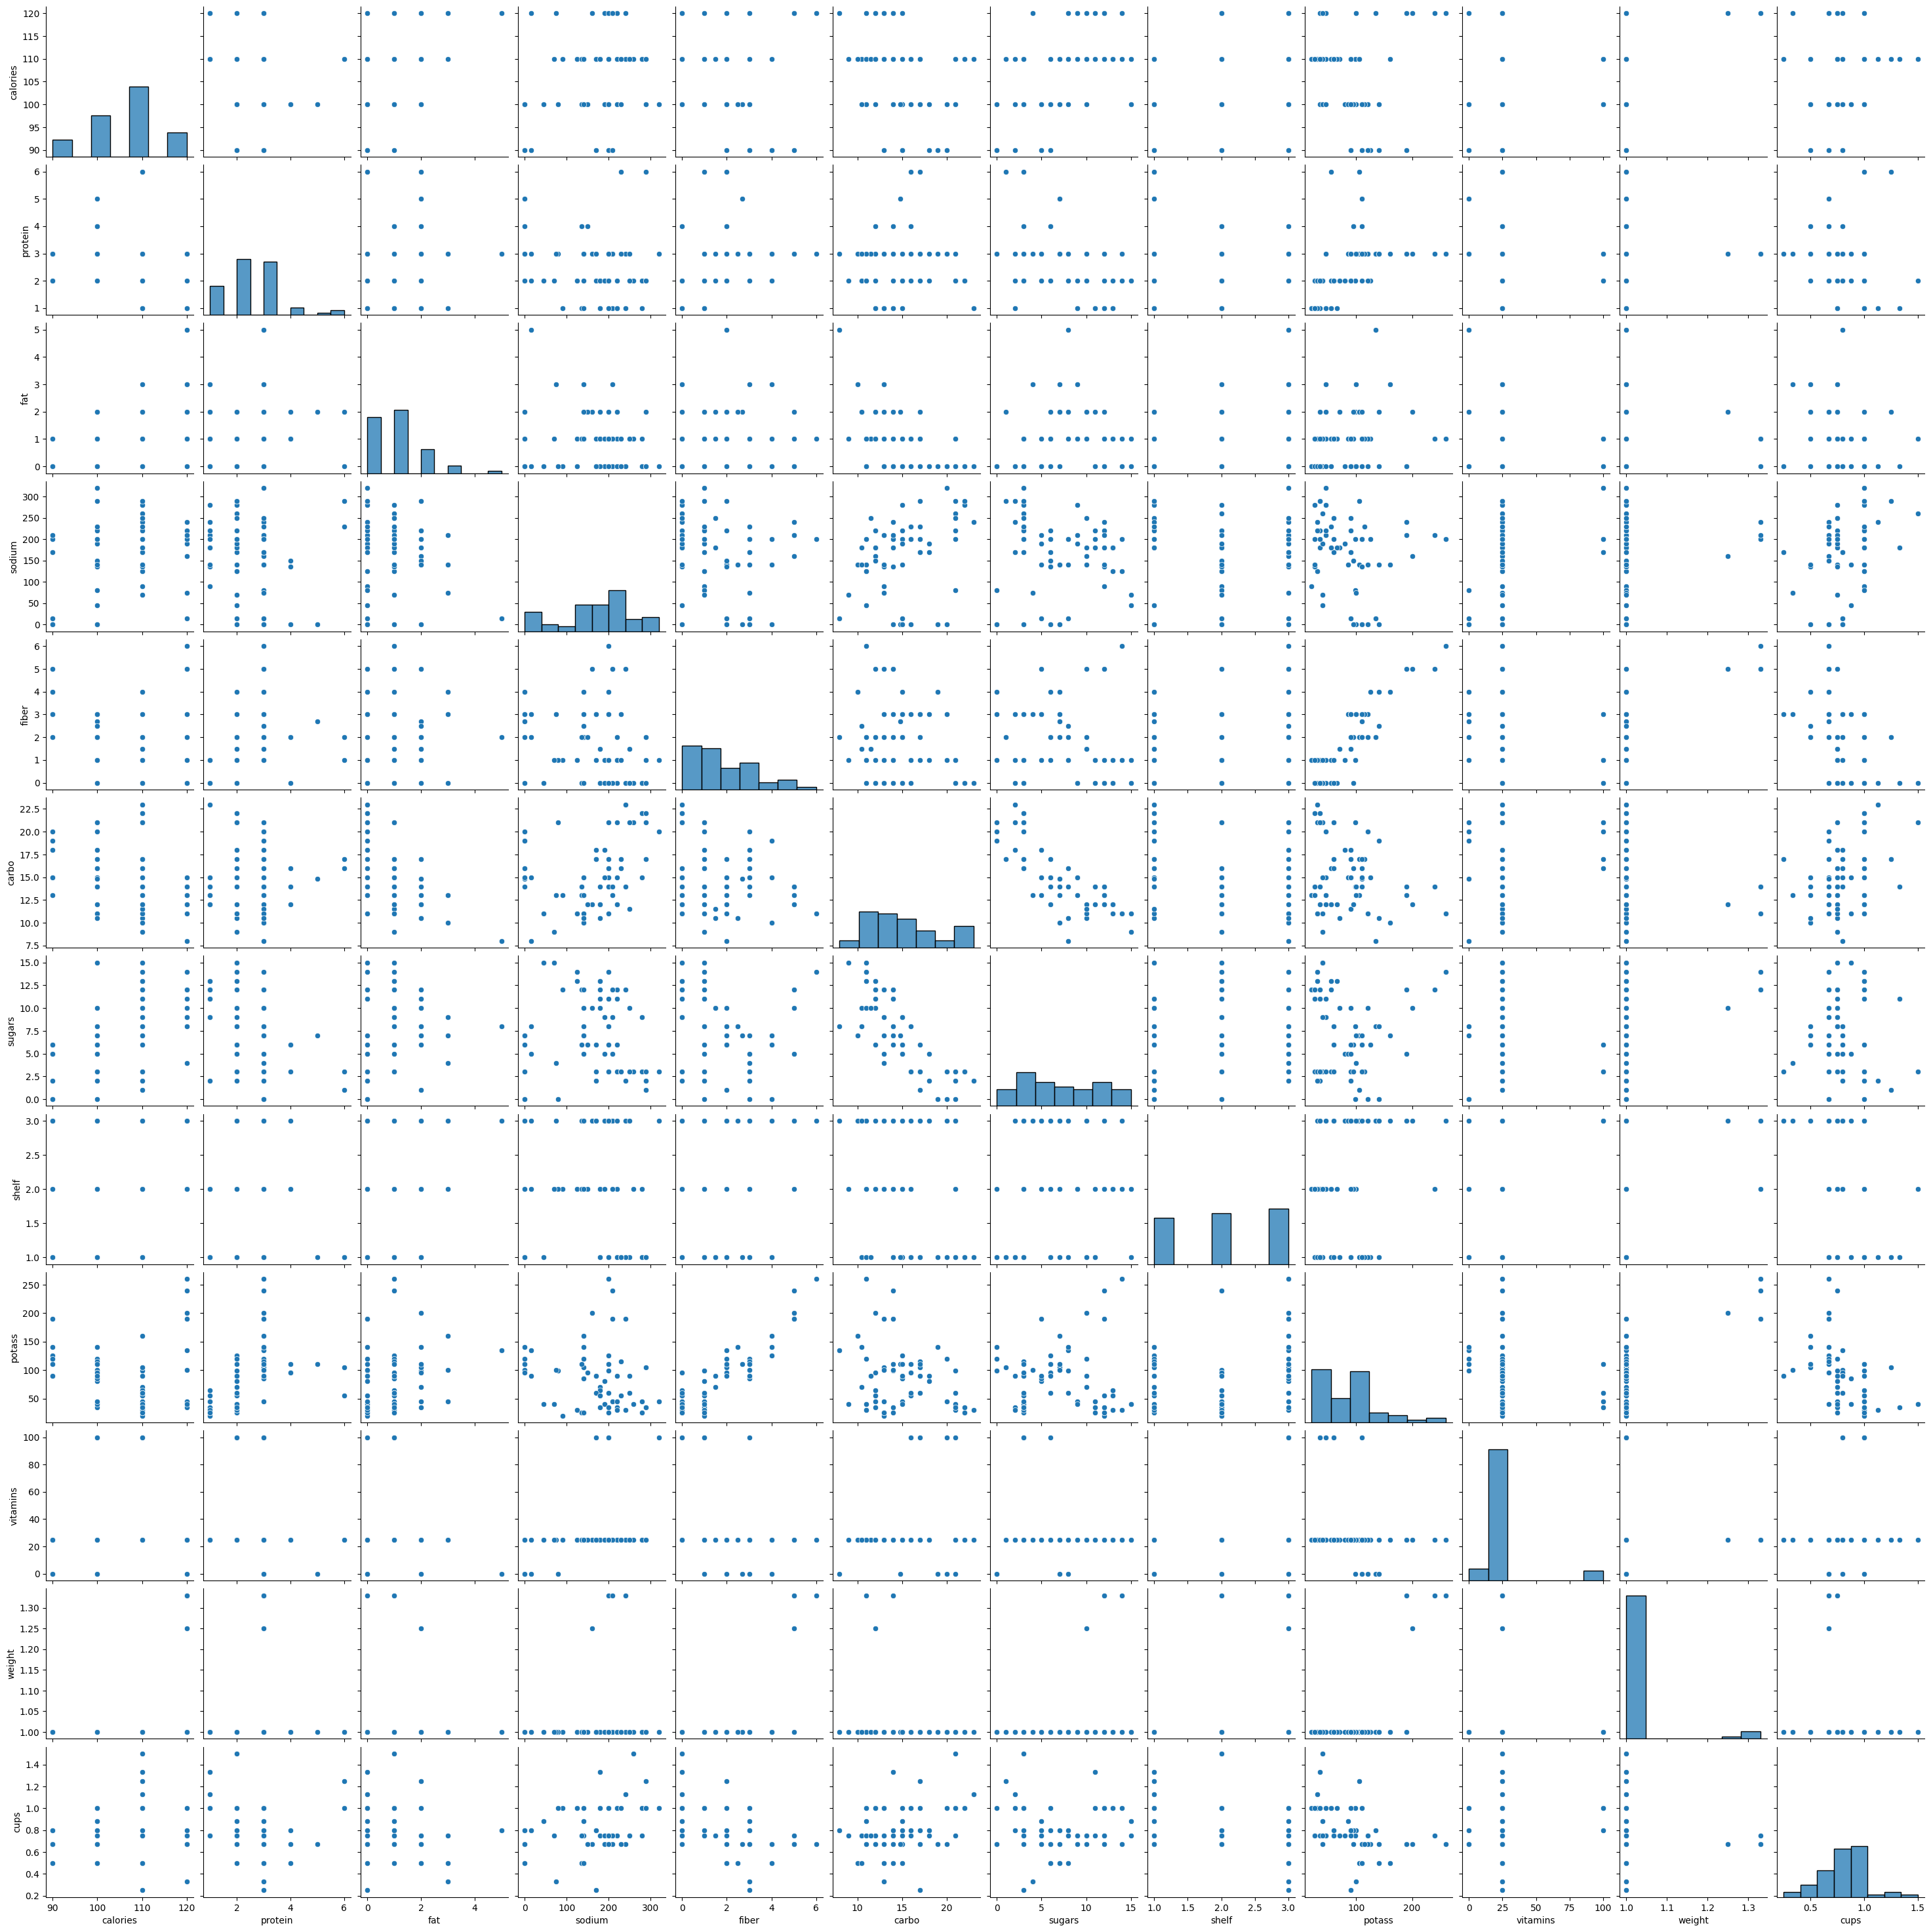

In [ ]:
import seaborn as sns
sns.pairplot(cereals_new)

# Crosstabs and Correlations

<Axes: >

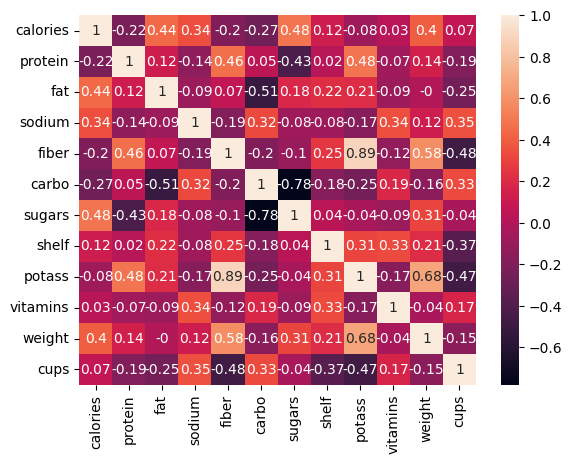

In [ ]:
numeric_columns = ['calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight',
       'cups']
correlations = cereals_new[numeric_columns].corr().round(decimals=2)
sns.heatmap(correlations,annot=True)

In [ ]:
#Create crosstabs of numeric columns grouped by manufacturer and type
#pd.crosstab(index=df.col1, columns=df.col2, values=df.col3, aggfunc='count')
crosstab = pd.crosstab(index=cereals_new['mfr_name'],
                       columns=cereals_new['type'],
                       values=cereals_new['calories'],
                       aggfunc='mean').round(2)
crosstab

type,C,H
mfr_name,,
American Home Food Products,NaN,100.0
General Mills,107.89,NaN
Kelloggs,107.78,NaN
Nabisco,90.00,100.0
Post,108.89,NaN
Quaker Oats,112.00,100.0
Ralston Purina,103.33,NaN


# Regression

const     99.606955
sugars     0.994934
dtype: float64
0.22796942673503207
1094.2532483281543
                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     18.01
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.59e-05
Time:                        14:49:29   Log-Likelihood:                -217.74
No. Observations:                  63   AIC:                             439.5
Df Residuals:                      61   BIC:                             443.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

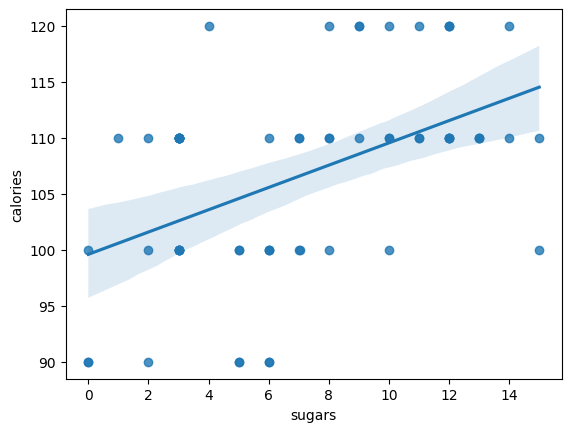

In [ ]:
#Simple regression with Calories as response variable and sugars as explanatory variable
import statsmodels.api as sm
import seaborn as sns
X = cereals_new['sugars']
y = cereals_new['calories']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.params['const':'sugars'])
print(model.rsquared)
print(model.mse_model)
predictions = model.predict(X)
print_model = model.summary()
sns.regplot(x=X['sugars'], y=y)
print(print_model)

In [ ]:
#multiple linear regression
import statsmodels.api as sm
X = cereals_new[['sugars', 'potass']]
y = cereals_new['calories']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     9.075
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           0.000360
Time:                        14:51:29   Log-Likelihood:                -217.56
No. Observations:                  63   AIC:                             441.1
Df Residuals:                      60   BIC:                             447.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5543      2.541     39.573      0.0

In [ ]:
#Create dummy variables for Cereal type

dummies2 = pd.get_dummies(cereals_new['type'], drop_first=True, dtype='int')
cereals_new = pd.concat([cereals_new, dummies2], axis=1)
cereals_new.columns

Index(['mfr_name', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight', 'cups',
       'H'],
      dtype='object')

In [ ]:
cereals_new

,mfr_name,type,calories,protein,fat,sodium,fiber,carbo,sugars,shelf,potass,vitamins,weight,cups,H
name,,,,,,,,,,,,,,,
100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8.0,3,135.000000,0,1.0,0.797353,0
Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8.0,3,98.666667,25,1.0,0.750000,0
Apple_Cinnamon_Cheerios,General Mills,C,110,2,2,180,1.5,10.5,10.0,1,70.000000,25,1.0,0.750000,0
Apple_Jacks,Kelloggs,C,110,2,0,125,1.0,11.0,14.0,2,30.000000,25,1.0,1.000000,0
Bran_Chex,Ralston Purina,C,90,2,1,200,4.0,15.0,6.0,1,125.000000,25,1.0,0.670000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,General Mills,C,110,2,1,250,0.0,21.0,3.0,3,60.000000,25,1.0,0.750000,0
Trix,General Mills,C,110,1,1,140,0.0,13.0,12.0,2,25.000000,25,1.0,1.000000,0
Wheat_Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3.0,1,115.000000,25,1.0,0.670000,0


In [ ]:
Xcolumns = ['protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'shelf', 'potass', 'vitamins', 'weight',
       'cups', 'H']
X = cereals_new[Xcolumns]
y = cereals_new['calories']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     16.94
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.20e-13
Time:                        14:54:18   Log-Likelihood:                -174.78
No. Observations:                  63   AIC:                             375.6
Df Residuals:                      50   BIC:                             403.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3955     11.683      0.205      0.8